## Author: Seth Cram
### Class: CS404 - Machine and Robotic Vision
### Assignment 7 - Training Neural Networks

### Instructions:
1. Use the Fashion MNIST dataset
2. Train a fully connected neural network on fashion MNIST using the keras library
3. Train a convolutional neural network on fashion MNIST using the keras library
4. Compare and contrast the final model accuracy between the fully connected network and convolutional network.
6. Plot the model performance over time (epochs), plotting both accuracy AND loss of the model for training AND validation set. 
7. For the convolutional neural network, feel free to directly use: https://medium.com/@chamara95.eng/neural-network-example-using-fashion-mnist-dataset-c19b48c86cf1 
8. For the fully connected network, you may have to reshape your input data
9. Report: Summarize what you did, your results, and include the graph of the model’s performance over the epochs. Include your code. 
(Google Colab comes with the modules pre-installed and provides some limited access to GPUs, if you are interested)
Do not use transfer learning here!

In [19]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from MachineVisionLibrary import mv_functs
from enum import Enum

#ensure our Python version uses proper div and print
from __future__ import absolute_import, division, print_function

class Classes(Enum):
    Tshirt_or_Top = 0
    Trouser = 1
    Pullover = 2
    Dress = 3
    Coat = 4
    Sandal = 5
    Shirt = 6
    Sneaker = 7
    Bag = 8
    Ankle_Boot = 9

In [20]:
#retrieve data set using Keras library

#get dataset
fashion_mnist = keras.datasets.fashion_mnist

#load data into a 60k, 10k split
(x_train, y_train_labels), (x_test, y_test_labels) = fashion_mnist.load_data()

In [21]:
#preprocess data

#greyscale
x_train = x_train/255.0
x_test = x_test/255.0

In [22]:
#Model Construction
model_FCN = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #flatten input into a single input layer
    keras.layers.Dense(128, activation=tf.nn.relu), #hidden layer with 128 hidden nodes + relu activation funct
    keras.layers.Dense(10, activation=tf.nn.softmax) #out layer w/ 10 output nodes + softmax activation (prob of 0-1 summing to 1)
])

#Model Configuration
model_FCN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', #not sure why 'sparse'
    metrics=['accuracy']
)

In [23]:
#Model training

epochs = 3

history_FCN = model_FCN.fit(
    x_train,
    y_train_labels,
    epochs=epochs
)

#Model Evaluation
test_loss_FCN, test_acc_FCN = model_FCN.evaluate(x_test, y_test_labels)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4980 - accuracy: 0.8248
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3763 - accuracy: 0.8645
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8537


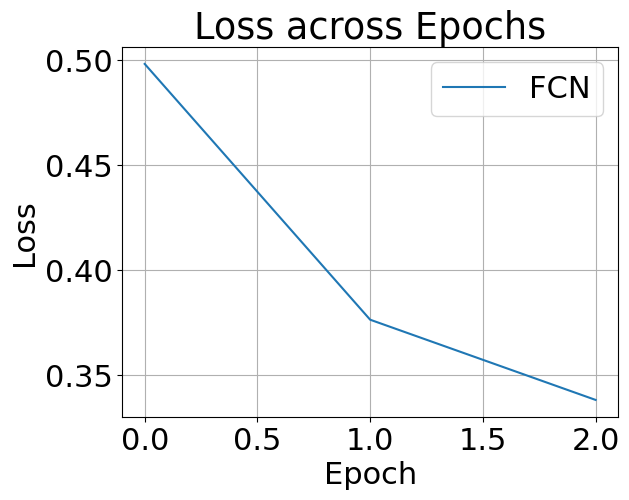

KeyError: 'acc'

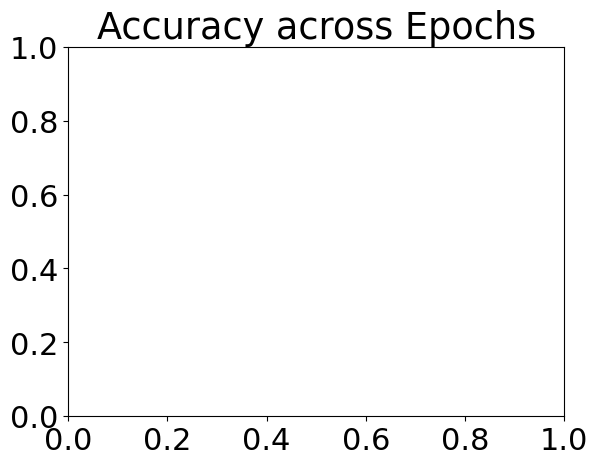

In [25]:
#Plotting

t = np.arange(epochs)

#Loss Plot
plt.rcParams.update({'font.size': 22})
plt.title("Loss across Epochs")
#plt.plot(t, history_CNN.history['loss'], label='CNN')
plt.plot(t, history_FCN.history['loss'], label='FCN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

#Accuracy Plot
plt.title("Accuracy across Epochs")
#plt.plot(t, history_CNN.history['accuracy'], label='CNN')
plt.plot(t, history_FCN.history['accuracy'], label='FCN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()
